In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/HMFMMUEX.TTC"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [128]:
#데이터 프레임 읽어오기
df = pd.read_csv('상하행20_07.csv')
df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)
df.head(2)

,요일,도로명,링크아이디,시점명,종점명,방향,거리,차선수,도심/외곽구분,권역구분,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
0,월,내부순환로,1000002500,정릉터널동측(내부순환로),홍지문터널북측,하행,1861,3,외곽,성북구,...,65.2725,64.3725,59.9575,40.895,55.375,66.9575,68.835,69.5625,70.8325,73.4775
1,월,내부순환로,1000002600,홍지문터널북측,정릉터널동측(내부순환로),상행,1848,3,외곽,종로구,...,55.3950,55.0400,55.3525,55.395,54.375,54.0825,56.915,57.2300,58.8525,61.7700


In [129]:
# 상하행데이터 분류
df_up = df.loc[df['방향']=='상행',]   # 상행만
df_down = df.loc[df['방향']=='하행',]  # 하행만
df_ratio = pd.DataFrame.copy(df_up) # 속도비율 데이터용 상행데이터 복사 

In [135]:
#속도비율 데이터 만들기
for j in range(df_up.shape[0]):
    for i in range(24):
        up,down = df_up.iloc[j,i+10],df_down.iloc[j,i+10]
        df_ratio.iloc[j,i+10] = up/down

In [136]:
#입력한 도로명과 요일에 해당하는 데이터프레임을 경로를 인덱스로 반환
def day_road(df,road,day):
    df = df.loc[df['도로명']==road]
    df = df.loc[df['요일']==day]
    df
    df['경로']=df['시점명']+'='+df['종점명']
    df.set_index('경로',inplace=True)
    df = df.iloc[:,-24:]

    return df

In [137]:
# 이중에 설정하면 됩니다. (볼려고 만든 코드)
print('도로명: ',df['도로명'].unique())
print('요일: ',df['요일'].unique())

도로명:  ['내부순환로' '강변북로' '동부간선도로' '자유로' '올림픽대로' '서부간선도로' '경부고속도로' '강남순환로' '분당수서로']
요일:  ['월' '화' '수' '목' '금']


In [138]:
#day_road() 함수 호출
df_speed_ratio = day_road(df_ratio,'올림픽대로','월')

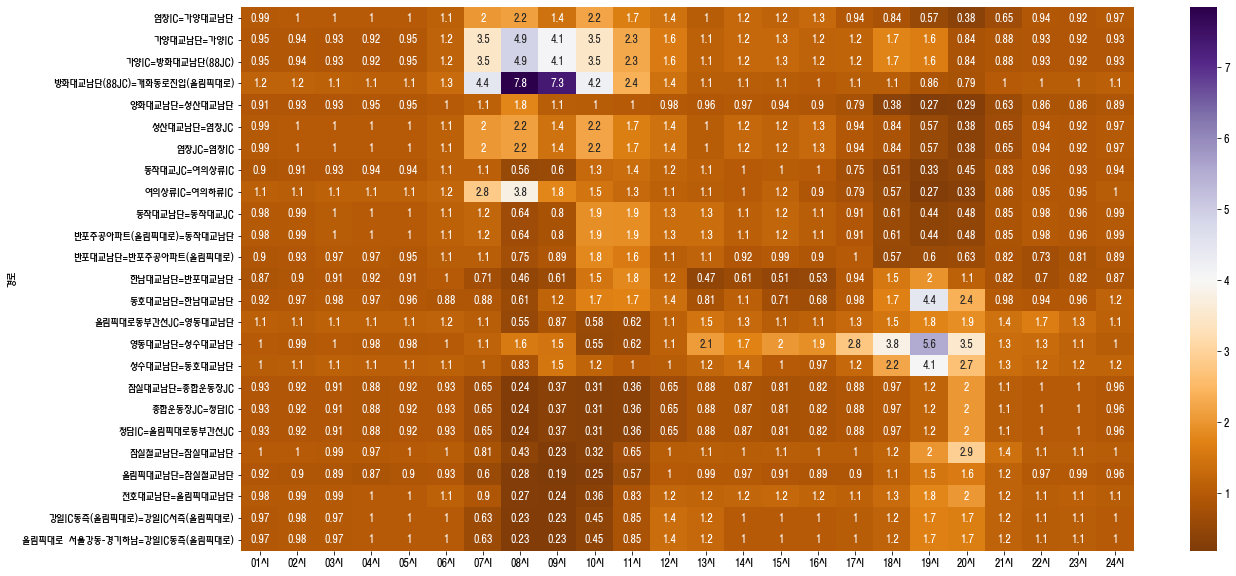

In [143]:
# Heatmap 시각화
plt.figure(figsize=(20,10))  # 사이즈 알아서 조절하세요!!
sns.heatmap(df_speed_ratio,annot=True, cmap='PuOr')
#plt.savefig(road+'_'+day+'.png')  ## 저장안하려면 주석처리
plt.show()

In [121]:
df_ratio.to_excel("속도비데이터_20_07.xlsx")